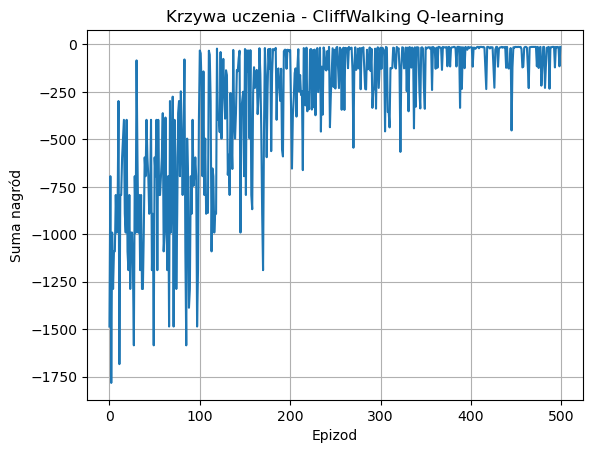

In [2]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

# Środowisko CliffWalking
env = gym.make("CliffWalking-v0")

# Parametry Q-learningu
learning_rate = 0.1
discount_factor = 0.99
epsilon = 1.0
epsilon_min = 0.1
epsilon_decay = 0.995
episodes = 500
max_steps = 100

state_size = env.observation_space.n
action_size = env.action_space.n
Q = np.zeros((state_size, action_size))

rewards = []

for episode in range(episodes):
    state, _ = env.reset()
    total_reward = 0

    for step in range(max_steps):
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state])

        next_state, reward, done, truncated, _ = env.step(action)

        best_next_action = np.argmax(Q[next_state])
        td_target = reward + discount_factor * Q[next_state][best_next_action]
        Q[state][action] += learning_rate * (td_target - Q[state][action])

        state = next_state
        total_reward += reward

        if done:
            break

    epsilon = max(epsilon_min, epsilon * epsilon_decay)
    rewards.append(total_reward)

plt.plot(rewards)
plt.xlabel("Epizod")
plt.ylabel("Suma nagród")
plt.title("Krzywa uczenia - CliffWalking Q-learning")
plt.grid(True)
plt.show()


In [ ]:
env = gym.make("CliffWalking-v0", render_mode="human")
env.reset()
env.render()


: 

In [1]:
import gymnasium as gym
import numpy as np
import time

# Parametry algorytmu
alpha = 0.1  # Współczynnik uczenia
gamma = 0.99  # Współczynnik dyskontowania
epsilon = 1.0  # Początkowa wartość epsilon dla strategii epsilon-greedy
epsilon_min = 0.1  # Minimalna wartość epsilon
epsilon_decay = 0.995  # Współczynnik zmniejszania epsilon
num_episodes = 50  # Liczba epizodów
max_steps = 100  # Maksymalna liczba kroków w epizodzie

# Inicjalizacja środowiska
env = gym.make("CliffWalking-v0", render_mode="human")
n_states = env.observation_space.n
n_actions = env.action_space.n

# Inicjalizacja tablicy Q
Q = np.zeros((n_states, n_actions))

# Lista do przechowywania sumarycznych nagród w każdym epizodzie
rewards = []

# Pętla po epizodach
for episode in range(num_episodes):
    state, _ = env.reset()
    total_reward = 0
    done = False

    for step in range(max_steps):
        # Wybór akcji: epsilon-greedy
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state, :])

        # Wykonanie akcji
        next_state, reward, done, truncated, _ = env.step(action)

        # Aktualizacja wartości Q
        best_next_action = np.argmax(Q[next_state, :])
        Q[state, action] = Q[state, action] + alpha * (
            reward + gamma * Q[next_state, best_next_action] - Q[state, action]
        )

        state = next_state
        total_reward += reward

        if done or truncated:
            break

    # Zmniejszanie epsilon
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

    # Zapisywanie sumarycznej nagrody
    rewards.append(total_reward)

    # Opcjonalnie: wyświetlanie postępów
    if (episode + 1) % 50 == 0:
        print(f"Epizod: {episode + 1}, Sumaryczna nagroda: {total_reward}")

# Zamknięcie środowiska
env.close()

# Wizualizacja krzywej uczenia
import matplotlib.pyplot as plt

plt.plot(rewards)
plt.xlabel("Epizod")
plt.ylabel("Sumaryczna nagroda")
plt.title("Krzywa uczenia agenta w środowisku CliffWalking-v0")
plt.show()


KeyboardInterrupt: 